In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'E:\data\saham1.csv')

In [3]:
df.head()

,Unnamed: 0,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Saham_AUM
0,0,0,51,7,4,0,3,1
1,1,0,55,2,2,0,3,1
2,2,1,50,7,1,0,3,1
3,3,0,53,1,2,0,3,1
4,4,0,47,3,4,1,3,1


In [4]:
df.columns

Index(['Unnamed: 0', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'referral_code_used', 'user_income_source',
       'Saham_AUM'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.head()

,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Saham_AUM
0,0,51,7,4,0,3,1
1,0,55,2,2,0,3,1
2,1,50,7,1,0,3,1
3,0,53,1,2,0,3,1
4,0,47,3,4,1,3,1


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Saham_AUM', axis = 1)
y = df['Saham_AUM']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df['Saham_AUM'], random_state = 42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
print(f'akurasi data train :{model.score(X_train, y_train):.2f}')

akurasi data train :0.72


In [12]:
print(f'akurasi data test : {model.score(X_test, y_test):.2f}')

akurasi data test : 0.66


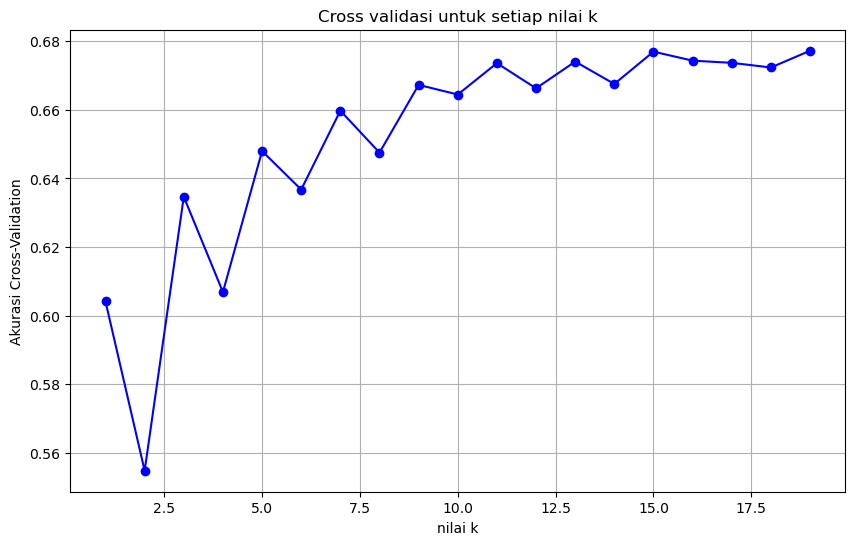

nilai k terbaik: 19


In [13]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = list(range(1, 20))

cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
    cross_val_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-', color='b')
plt.title('Cross validasi untuk setiap nilai k')
plt.xlabel('nilai k')
plt.ylabel('Akurasi Cross-Validation')
plt.grid(True)
plt.show()

k_terbaik = k_values[cross_val_scores.index(max(cross_val_scores))]
print(f'nilai k terbaik: {k_terbaik}')

In [14]:
model1 = KNeighborsClassifier(n_neighbors = 19)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [15]:
print(f'akurasi data train :{model1.score(X_train, y_train):.2f}')

akurasi data train :0.71


In [16]:
print(f'akurasi data test : {model1.score(X_test, y_test):.2f}')

akurasi data test : 0.70
